<a href="https://colab.research.google.com/github/lucasfldmn/twrds_unbiased_anns/blob/main/notebooks/synthetic_training_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats

# Drawing Functions

## Square

In [ ]:
def make_square(color = 'red', size = 50, save = True, number = None, display = False):
  # Define figure
  fig = plt.figure(figsize = (10,10))
  ax = fig.gca()

  # Set background and plotting area to black, remove axis
  bg = fig.patch
  bg.set_facecolor('black')
  plt.axis('off')

  # Draw square
  # Calculate width and height
  square_size = size/100
  # Calculate starting coordinates as rectangles are drawn from the bottom left corner
  starting_pos = (1 - square_size) / 2
  circle = plt.Rectangle(xy = (starting_pos, starting_pos), width = square_size, height = square_size, color = color)
  ax.add_artist(circle)

  # Show result if desired
  if display:
    plt.show()

  # Save file if desired
  if save:
    # Check if number is given and set filename
    if number is not None:
      filename = '{:05d}_square_{}_{:03d}.png'.format(number, color, int(size)) 
    else:
      filename = 'square_{}_{:03d}.png'.format(color, int(size)) 
    fig.savefig(filename, dpi = 100, facecolor = 'black')

    
  # Close figure
  plt.close()

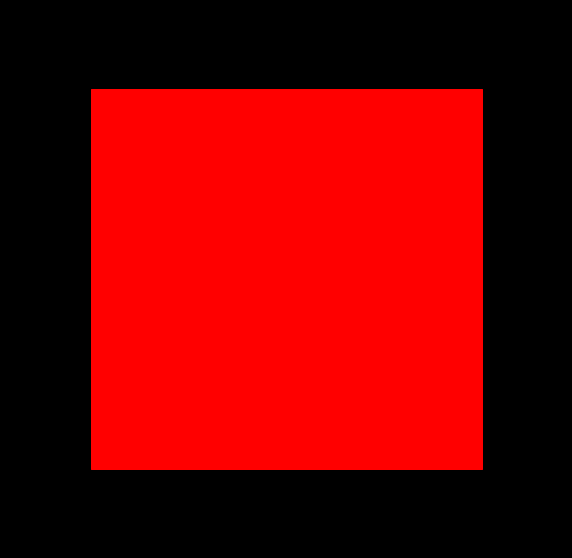

In [ ]:
make_square(color = 'red', size = 70, save = False, display = True)

## Circle

In [ ]:
def make_circle(color = 'red', size = 50, save = True, number = None, display = False):
  # Define figure
  fig = plt.figure(figsize = (10,10))
  ax = fig.gca()

  # Set background and plotting area to black, remove axis
  bg = fig.patch
  bg.set_facecolor('black')
  plt.axis('off')

  # Draw circle
  circle = plt.Circle(xy = (0.5, 0.5), radius = 0.5*size/100, color = color)
  ax.add_artist(circle)

  # Show result if desired
  if display:
    plt.show()

  # Save file if desired
  if save:
    # Check if number is given and set filename
    if number is not None:
      filename = '{:05d}_circle_{}_{:03d}.png'.format(number, color, int(size)) 
    else:
      filename = 'circle_{}_{:03d}.png'.format(color, int(size)) 
    fig.savefig(filename, dpi = 100, facecolor = 'black')

  # Close figure
  plt.close()

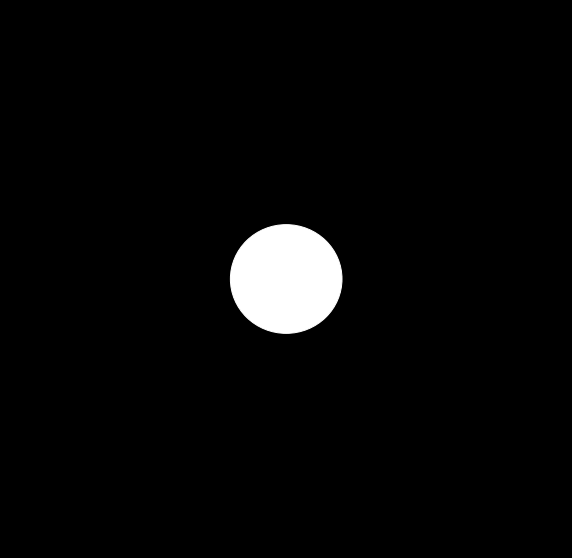

In [ ]:
make_circle(color = 'white', size = 20, save = False, display = True)

# Generation of Training Data

## Training Parameters

In [ ]:
# Total number of samples
n_samples = 100

# Other colors (randomly chosen)
colors = ['red', 'blue', 'green']

# Percentage of samples for each group
perc_white_square = 25
perc_white_circle = 25
perc_colorful_square = 25
perc_colorful_circle = 25

# Means of normal distribution for the four groups
mean_white_square = 50
mean_white_circle = 50
mean_colorful_square = 50
mean_colorful_circle = 50

# Sanity checks
# Percentages must sum up to 100
if not perc_white_square + perc_white_circle + perc_colorful_square + perc_colorful_circle == 100:
  print("Warning: Percentages must add up to exactly 100 %.")
# Means must be in range 1-100
if mean_white_square < 1 or mean_white_square > 100:
  print("Warning: Mean for white squares must be between 1 and 100 (inclusive).")
if mean_white_circle < 1 or mean_white_circle > 100:
  print("Warning: Mean for white circles must be between 1 and 100 (inclusive).")
if mean_colorful_square < 1 or mean_colorful_square > 100:
  print("Warning: Mean for colorful squares must be between 1 and 100 (inclusive).")
if mean_colorful_circle < 1 or mean_colorful_circle > 100:
  print("Warning: Mean for colorful circles must be between 1 and 100 (inclusive).")

# Calculate number of samples for each group
n_white_square = round(n_samples * perc_white_square / 100)
n_white_circle = round(n_samples * perc_white_circle / 100)
n_colorful_square = round(n_samples * perc_colorful_square / 100)
n_colorful_circle = round(n_samples * perc_colorful_circle / 100)

## Truncated Normal Distribution

In [ ]:
def draw_from_truncated_normal_distribution(n_samples, mean, stddev = 10):
  # Set lower and upper bounds for truncation
  lower = 1
  upper = 100
  # Set parameters of normal distribution
  mu = mean
  sigma = stddev
  # Randomly sample
  samples = stats.truncnorm.rvs((lower-mu)/sigma, (upper-mu)/sigma, loc = mu, scale = sigma, size = n_samples)
  return np.reshape(samples.round(), (n_samples, 1))

## Sample Array

In [ ]:
# White squares
color = np.ones((n_white_square,1), dtype = bool) # True = white
shape = np.ones((n_white_square,1), dtype = bool) # True = square
size = draw_from_truncated_normal_distribution(n_white_square, mean_white_square)
white_squares = np.hstack((color, shape, size))

# White circles
color = np.ones((n_white_circle,1), dtype = bool) # True = white
shape = np.zeros((n_white_circle,1), dtype = bool) # False = circle
size = draw_from_truncated_normal_distribution(n_white_circle, mean_white_circle)
white_circles = np.hstack((color, shape, size))

# Colorful squares
color = np.zeros((n_colorful_square,1), dtype = bool) # False = colorful
shape = np.ones((n_colorful_square,1), dtype = bool) # True = square
size = draw_from_truncated_normal_distribution(n_colorful_square, mean_colorful_square)
colorful_squares = np.hstack((color, shape, size))

# Colorful circles
color = np.zeros((n_colorful_circle,1), dtype = bool) # False = colorful
shape = np.zeros((n_colorful_circle,1), dtype = bool) # False = circle
size = draw_from_truncated_normal_distribution(n_colorful_circle, mean_colorful_circle)
colorful_circles = np.hstack((color, shape, size))

# Stack all together
samples = np.vstack((white_squares, white_circles, colorful_squares, colorful_circles))

# Shuffle array
np.random.shuffle(samples)

## Generation Loop

In [ ]:
# Set starting number for images
img_no = 1

# Iterate over samples and create images
for sample in samples:
  # Get color of sample
  if sample[0]:
    sample_color = 'white'
  else:
    sample_color = np.random.choice(colors)

  # Get size of sample
  sample_size = sample[2]

  # Call shape generator based on sample shape
  if sample[1]:
    make_square(color = sample_color, size = sample_size, save = True, number = img_no, display = False)
  else:
    make_circle(color = sample_color, size = sample_size, save = True, number = img_no, display = False)

  # Increase image number
  img_no += 1  